### 특성자동선택

#### 일변량통계
> http://goo.gl/9NvAoQ    

> 개개의 특성과 타깃 사이에 중요한 통계 관계가 있는지 계산 
> 분류: 분산분석(ANOVA), 일변량(각 특성이 독립적으로 평가)   
> 분류 : f_classif(기본값), 회귀: f_regression   
> p-value에 기초하여 특성을 제외하는 방식을 선택함(높은 p-value특성을 제외)   
> slectKBest 함수 -> 고정된 K개의 특성을 선택  
> selectPercentile 함수-> 지정된 비율만큼 특성을 선택   

In [123]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [124]:
cancer = load_breast_cancer() 

#고정된 난수 발생 
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

#노이즈특성에 추가 (처음30개는 원본, 다음 50개는 노이즈)
X_w_noise = np.hstack([cancer.data, noise])

In [125]:
#데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

#f_classif(기본값)과 SelectPercentile을 이용해 특성 선택 50% 
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

#훈련세트에 적용 
X_train_selected = select.transform(X_train)

In [126]:
X_train.shape

(284, 80)

In [127]:
X_train_selected.shape   #특성개수 줄어듬 

(284, 40)

In [128]:
#선택된 특성을 불리언 값으로 표시. 어떤 특성이 선택되었는지 확인 
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


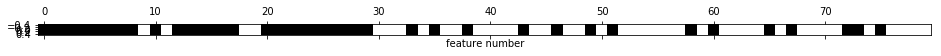

In [129]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("feature number")   #특성번호
plt.show()


In [130]:
### logistic 예제 (전체 특성 vs 선택된 특성 )

In [131]:
from sklearn.linear_model import LogisticRegression

#테스트 데이터 변환 
X_test_selected = select.transform(X_test)

In [132]:
X_test_selected.shape

(285, 40)

In [133]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))

전체 특성을 사용한 점수: 0.951


In [134]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train_selected, y_train)
print("선택된 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

선택된 특성을 사용한 점수: 0.933


### 모델기반 특성선택 
#### 모델기반 특성은 한번에 모든 특성을 고려, 사용모델이 상호작용을 잡아낼수 있다면 -> 상호작용부분을 반영할수 있음.

In [135]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import  RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=5000, random_state=42), threshold='median')

In [136]:
select.fit(X_train, y_train) 
X_train_l1 = select.transform(X_train)    #랜덤포레스트적용결과

In [137]:
X_train.shape, X_train_l1.shape  #특성수 줄어듬

((284, 80), (284, 40))

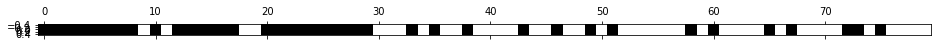

In [138]:
maks = select.get_support() 
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.show()

In [139]:
#성능 향상 확인 
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='lbfgs', max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
score

0.9508771929824561

### 반복적선택 
반복적으로 제거해 나감 

In [140]:
from sklearn.feature_selection import RFE 
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), 
            n_features_to_select=40)
#미리 지정한 feature수:40개

In [141]:
select.fit(X_train, y_train)
mask = select.get_support() 

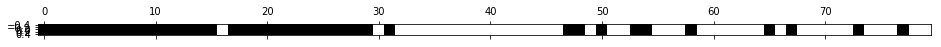

In [142]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.show()

In [143]:
X_train_rfe= select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [144]:
LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9508771929824561